In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [286]:
df = pd.read_csv('laptop_data.csv')

In [287]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [288]:
df.shape

(1303, 12)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [290]:
df.duplicated().sum()

np.int64(0)

In [291]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [292]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [293]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [294]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [295]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA

In [297]:
import seaborn as sns

Text(0.5, 1.0, 'Checking skewness')

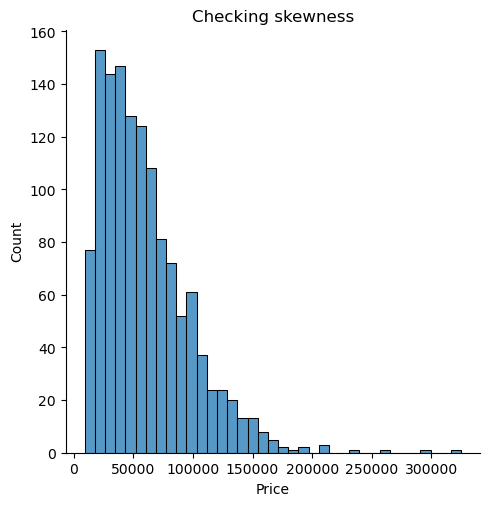

In [298]:
sns.displot(df['Price'])
plt.title("Checking skewness")

Text(0.5, 1.0, 'Quantity of laptops per brand')

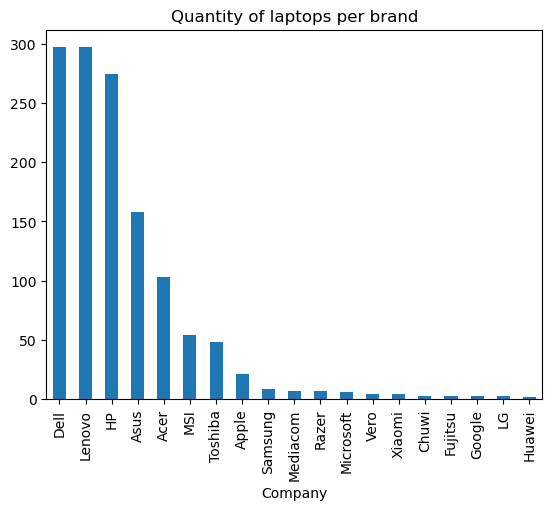

In [299]:
df['Company'].value_counts().plot(kind='bar')
plt.title("Quantity of laptops per brand")

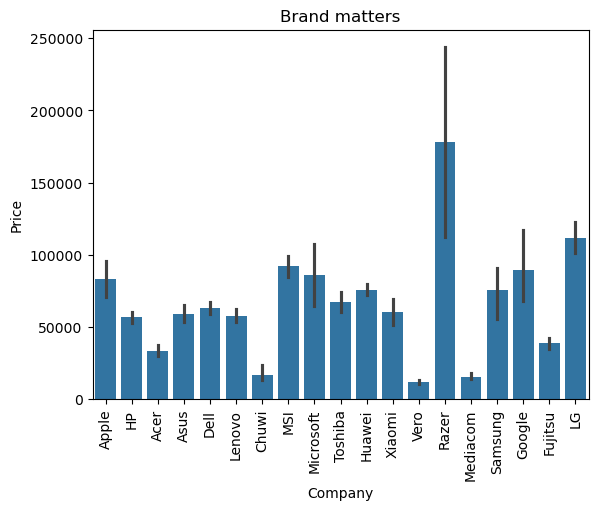

In [300]:
sns.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.title("Brand matters")
plt.show()

Text(0.5, 1.0, 'Type of laptops')

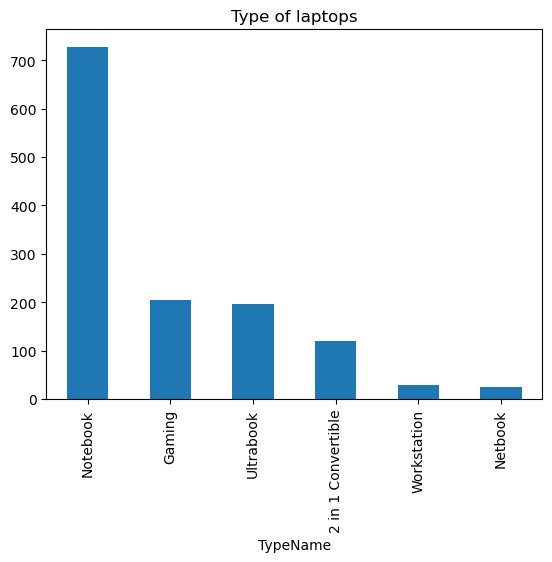

In [301]:
df['TypeName'].value_counts().plot(kind='bar')
plt.title("Type of laptops")

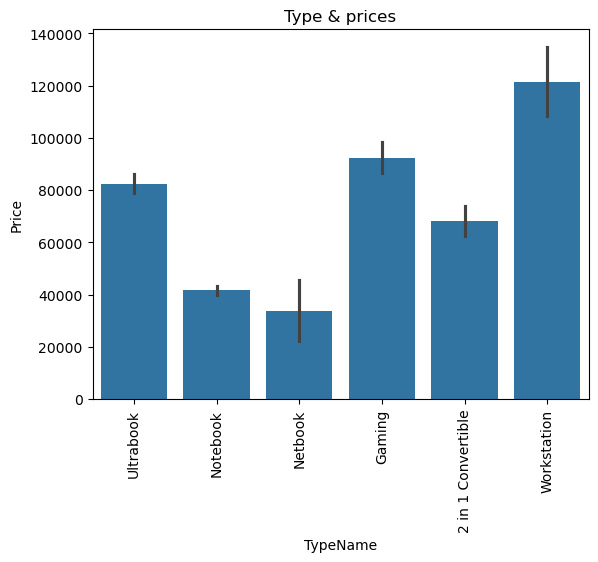

In [302]:
sns.barplot(x=df['TypeName'] , y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title("Type & prices")
plt.show()

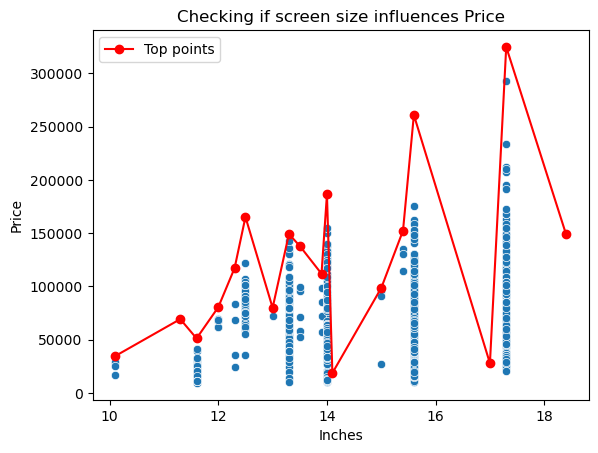

In [303]:
sns.scatterplot(x='Inches', y='Price', data=df)
plt.title("Checking if screen size influences Price")

top_points = df.groupby('Inches')['Price'].max().reset_index()
plt.plot(top_points['Inches'], top_points['Price'], color='red', marker='o', label='Top points')

plt.legend()
plt.show()

## Feature Engineering

In [304]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [305]:
# making touchscreen column

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if "Touchscreen" in x else 0)

In [306]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
598,Dell,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,88977.6000,1
724,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

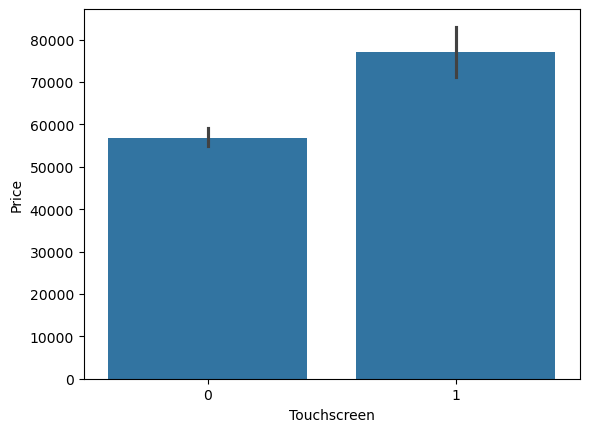

In [307]:
# Checking this column is useful or not
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [308]:
# making IPS column 

df['Ips'] = df['ScreenResolution'].apply(lambda x : 1 if "IPS" in x else 0)

<Axes: xlabel='Ips', ylabel='Price'>

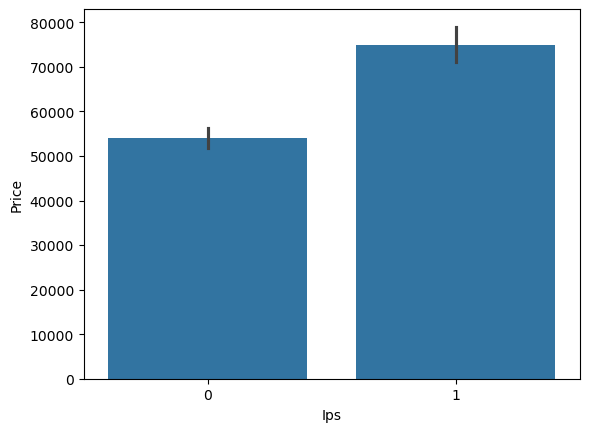

In [309]:
# Checking this column is useful or not
sns.barplot(x=df['Ips'],y=df['Price'])

### Screen Resolution

In [310]:
# resolution is written like Quad HD+ / Touchscreen 3200x1800 , so we splitting the
# string where's x
new = df['ScreenResolution'].str.split('x',n=1,expand=True) 
#Normally, split() returns a list for each row.
#expand=True → returns a DataFrame with separate columns instead of lists.

In [311]:
df['Y_res'] = new[1].astype('int')
df['X_res'] = new[0].astype(str)

X_res looks like 
IPS Panel 4K Ultra HD 3840
so , we are extrating the last number for x_res value

In [312]:
#Using regular expression
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype('int')


In [313]:
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: int64

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  Y_res             1303 non-null   int64  
 14  X_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [315]:
#checking Co-relation
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])
numeric_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
Y_res          0.552809
X_res          0.556529
Name: Price, dtype: float64

In [316]:
df['ppi'] = ((((df['X_res']**2 + df['Y_res']**2))**0.5)/df['Inches']).astype('float')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  Y_res             1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64

In [318]:
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])
numeric_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
Y_res          0.552809
X_res          0.556529
ppi            0.473487
Name: Price, dtype: float64

In [319]:
# now no need for sr
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace=True)

In [320]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
724,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7,71847.0144,0,0,127.335675


### CPU

In [321]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [322]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0,0,0,141.211998,Intel Core i5


In [323]:
#Helper function
def fetch_processor(text):
    if text =='Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [324]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [325]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [326]:
df['Cpu_GHz'] = df['Cpu'].str.extract(r'(\d+\.?\d*)\s*GHz$').astype(float)

In [327]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand,Cpu_GHz
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7,2.5
111,Dell,Ultrabook,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1200,1,0,276.053530,Intel Core i7,Intel Core i7,2.4
724,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0,127.335675,Intel Core i7,Intel Core i7,2.8
659,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167691.8736,0,1,254.671349,Intel Core i7,Intel Core i7,2.8
327,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,55938.6720,0,0,141.211998,Intel Core i7,Intel Core i7,2.7


In [329]:
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])
numeric_df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
Cpu_GHz        0.430293
Name: Price, dtype: float64

In [331]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [332]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Cpu_GHz
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1


### Storage

In [335]:
# Convert all entries to string and clean initial format
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Split memory into two parts if '+' present
new = df["Memory"].str.split("+", n=1, expand=True)

# Create first and second layer memory parts
df["first"] = new[0].astype(str).str.strip()
df["second"] = new[1].astype(str).fillna("0").str.strip()

# Identify memory types for first layer
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Identify memory types for second layer
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only numeric part from both layers safely
df["first"] = df["first"].fillna("0").astype(str).str.replace(r'[^0-9]', '', regex=True)
df["second"] = df["second"].fillna("0").astype(str).str.replace(r'[^0-9]', '', regex=True)

# Convert numeric parts to integers (coercing errors)
df["first"] = pd.to_numeric(df["first"], errors="coerce").fillna(0).astype(int)
df["second"] = pd.to_numeric(df["second"], errors="coerce").fillna(0).astype(int)

# Compute final storage type sizes
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])

# Drop temporary columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


In [341]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Cpu_GHz,HDD,SSD,Hybrid,Flash_Storage
1029,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.63,57542.4000,0,0,127.335675,Intel Core i5,2.5,0,256,0,0
579,Dell,Notebook,8,256 SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0,0,141.211998,Intel Core i7,2.7,0,256,0,0
22,HP,Notebook,4,500 HDD,AMD Radeon R2,No OS,1.86,13746.2400,0,0,100.454670,AMD Processor,1.5,500,0,0,0
880,HP,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 620,Windows 10,1.28,90576.0000,1,0,165.632118,Intel Core i5,2.5,0,256,0,0
57,Asus,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,2.00,31232.2032,0,0,100.454670,Intel Core i5,2.5,0,256,0,0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   Touchscreen    1303 non-null   int64  
 9   Ips            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  Cpu brand      1303 non-null   object 
 12  Cpu_GHz        1303 non-null   float64
 13  HDD            1303 non-null   int64  
 14  SSD            1303 non-null   int64  
 15  Hybrid         1303 non-null   int64  
 16  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(3), int32(1), int64(6), objec

In [343]:
df.drop(columns=['Memory'],inplace=True)

In [344]:
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])
numeric_df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
Cpu_GHz          0.430293
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
# as we see, Hybrid and flash_Storage is of no use
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [347]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Cpu_GHz,HDD,SSD
732,HP,Notebook,6,AMD Radeon 520,Windows 10,2.1,34632.0,0,0,141.211998,AMD Processor,3.0,1000,128


### GPU

In [349]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

ARM is only one, remove it

In [354]:
df.drop(df[df['Gpu_brand'] == 'ARM'].index,inplace=True)

In [355]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

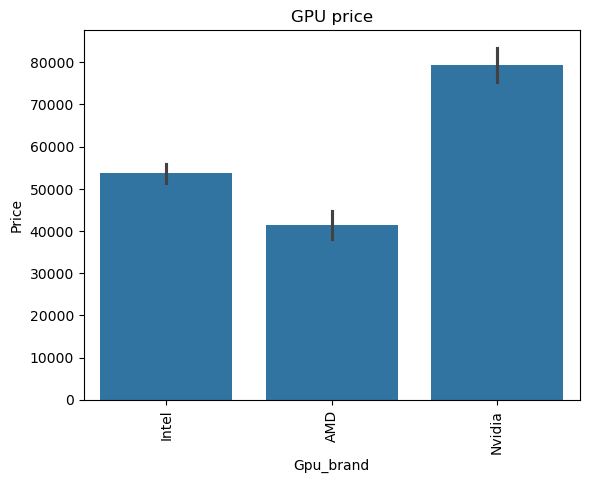

In [357]:
sns.barplot(x=df['Gpu_brand'] , y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title("GPU price")
plt.show()

In [358]:
df.drop(columns=['Gpu'],inplace=True)

In [359]:
df.sample()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Cpu_GHz,HDD,SSD,Gpu_brand
824,Lenovo,Ultrabook,8,Windows 10,1.13,99900.0,0,1,157.350512,Intel Core i5,2.5,0,0,Intel


### OS

In [360]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

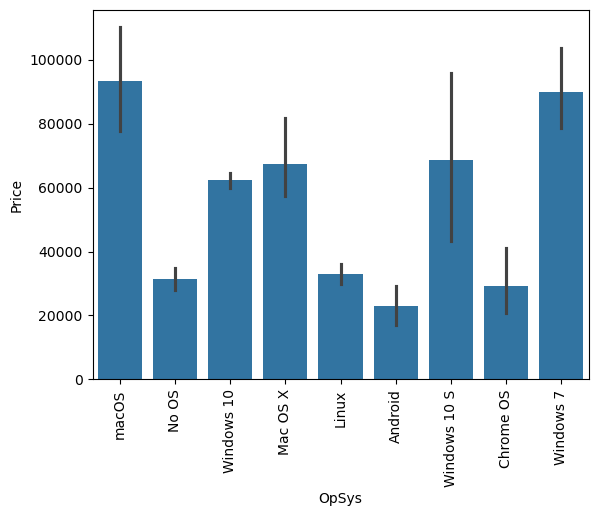

In [361]:
sns.barplot(x=df['OpSys'] , y=df['Price'])
plt.xticks(rotation = 'vertical')

In [364]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'Mac OS X' or inp == 'macOS':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [365]:
df['os'] = df['OpSys'].apply(cat_os) 

In [378]:
df.sample()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Cpu_GHz,HDD,SSD,Gpu_brand,os
279,Lenovo,Notebook,8,No OS,2.8,45234.72,0,0,127.335675,Intel Core i7,1.8,2000,0,Nvidia,Others/No OS/Linux


In [379]:
df.drop(columns=['OpSys'],inplace=True)

([0, 1, 2],
 [Text(0, 0, 'Mac'), Text(1, 0, 'Others/No OS/Linux'), Text(2, 0, 'Windows')])

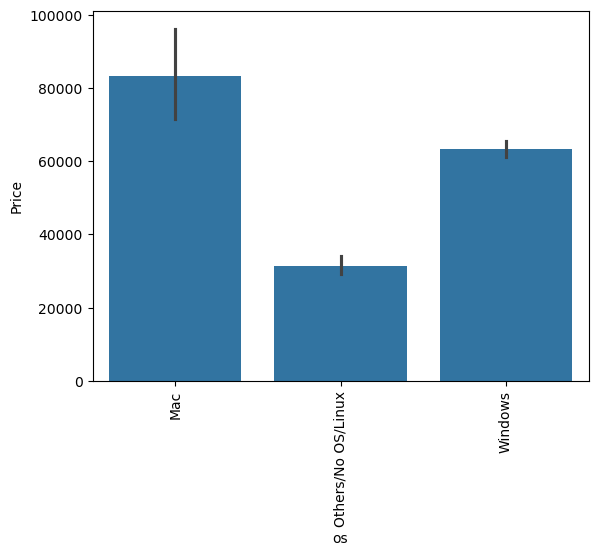

In [381]:
sns.barplot(x=df['os'] , y=df['Price'])
plt.xticks(rotation = 'vertical')

### Weight

In [382]:
df['Weight'].value_counts()

Weight
2.200    126
2.100     58
2.000     45
2.400     44
2.300     41
        ... 
0.990      1
2.591      1
2.210      1
2.191      1
2.340      1
Name: count, Length: 171, dtype: int64

<Axes: xlabel='Weight', ylabel='Price'>

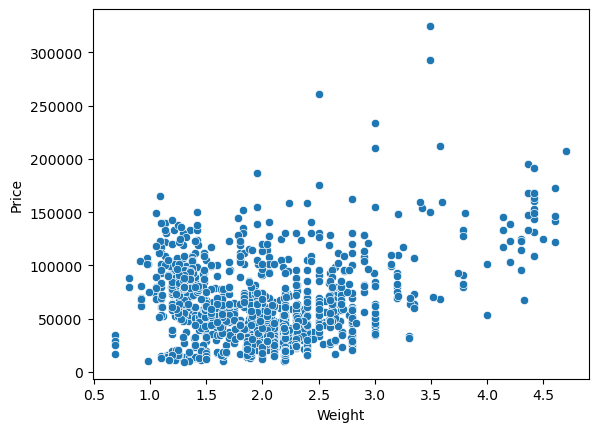

In [383]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

## Corelation with everycol

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   Cpu_GHz      1302 non-null   float64
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu_brand    1302 non-null   object 
 13  os           1302 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(4), object(5)
memory usage: 142.4+ KB


<Axes: >

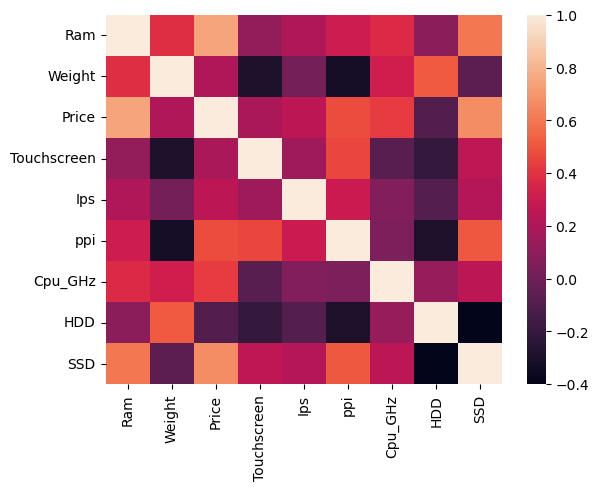

In [386]:
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])
sns.heatmap(numeric_df.corr())